# Section 3.2: Test the potential parametrization

In [1]:
import sys
import pickle
from numpy import *

import treal_functions
import slopes_functions
import prepare_functions

reload(treal_functions)
reload(slopes_functions)
reload(prepare_functions)

sim = ['g1.08e11'][0]
directory='/cs/sci/freundlich/CUSPCORE/NIHAO_data/' 

with open(directory+'NIHAO-%s.pickle'%sim[1:]) as f:
    gl = pickle.load(f)
 
gl = slopes_functions.derive_slopes(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)    
gl = prepare_functions.define_brho(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)
treal=treal_functions.load_or_create_gl(sim)

fitrange=prepare_functions.get_fitrange(gl)
gl=prepare_functions.reduce_range_gl(gl,fitrange)
treal=prepare_functions.reduce_range_Treal(treal,fitrange)

sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Model')
import cuspcore_aux
import cuspcore_plots
import evolving
import fitting as fit
reload(cuspcore_aux)
reload(cuspcore_plots)
reload(evolving)
reload(fit)

from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

a_array=[]

for (i,ss) in zip(range(size(gl)),gl):
    a_array.append(ss['a'])           

a_array=array(a_array)

ok_fangzhou,r12_fangzhou,rvir_fangzhou,mvir_fangzhou=get_fangzhou_radii(sim,a_array,get_all=False)
gl=fit.do_fits(gl,rvir_fangzhou,mvir_fangzhou,1.,0.01,2.,components=['d'])

print 'Done'


/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:33: RuntimeWarning: invalid value encountered in greater_equal
  r_range=where((log10(r/Rvir)>=rlim[0])&(log10(r/Rvir)<rlim[1]))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:33: RuntimeWarning: invalid value encountered in less
  r_range=where((log10(r/Rvir)>=rlim[0])&(log10(r/Rvir)<rlim[1]))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:42: RuntimeWarning: invalid value encountered in divide
  dM = M/sqrt(cumsum(n))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:46: RuntimeWarning: divide by zero encountered in log10
  logrho=log10(rho)
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:79: RuntimeWarning: divide by zero encountered in log10
  logsigmar = log10(sigmar)
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:80: RuntimeWarning: divide by zero encountered in log10
  logsigmar2 = 2*log10(sigmar)
/cs/sci/freundlich/CU

 
Loading existing file Treal-1.08e11.pickle
Reducing the range of gl
Reducing the range of Treal


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Done


In [2]:
# COMPARE -GM/r and U

reload(treal_functions)

from matplotlib.pylab import *
G = 4.499753324353496e-06 # gravitational constant [kpc^3 Gyr^-2 Msun^-1]

rlim=[-2.,0.]
component='d'
tmin=3.
axlim=array([-2.,1.,-1.,1.])

parsec=3.085677581e16 #m
year=3.1557600e7 #s
kms_to_kpcGyr=1/parsec*year*1e9

x=logspace(-2,1,1000)
c=10.
mu=log(1+c)-c/(1+c)
Ep1=-1/mu*(1/x*log(1+c*x)-c/(1+c))
Ep2=-1/x
Epfid=-1/x*(log(1+c*x)-c*x/(1+c*x))/mu

###########################

In [3]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,6)
figsize=(8,12)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.95
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.95
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1


[None, None, None, None, None]

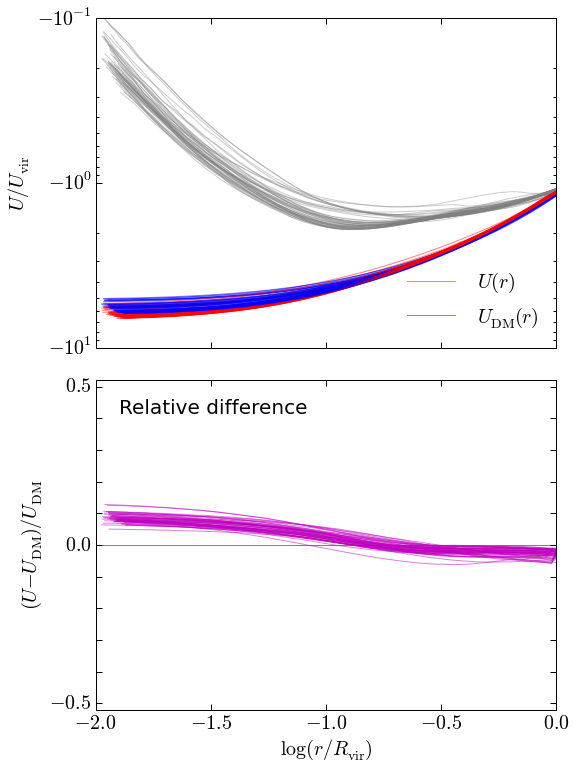

In [7]:

# INTRODUCE Mtot/M as FACTOR (SIMPLE)
from scipy import stats

logx=log10(x)

fig=figure(figsize=figsize)
clf()

ax3=subplot(211)

counter=0
for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Uvir=G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    logr=log10(r/Rvir)
    
    Utot=treal_functions.Utot(ss,r)
    Uin=treal_functions.Uin(ss,r)
    DU=(Utot-Uin)/Uin
    
    try:
        M_rmin=max(ss['d']['r'][0],ss['all']['r'][0])
        M_d = ss['d']['M'][where(ssi['d']['r']>M_rmin)]
        M_a = ss['all']['M'][where(ss['d']['r']>M_rmin)]
        M_rr=ri[where(ss['d']['r']>M_rmin)]
        M_ratio=M_a/M_d

        slope, intercept,_,_,_ = stats.linregress(log10(M_rr/Rviri),log10(M_ratio))
        Mratio=10**intercept
        Mn=-slope
    except:
        Mratio=1
        Mn=0
                            
    p=ss['d']['lsfit_brho_b2_g3_unconstrained']['p']
    Udekel=Mratio*(r/Rvir)**(-Mn)*prf.U(r, p, 'an')
    
    if t>tmin:
        Ut=abs(Uin[-1])
        if counter==0:
            ax3.plot(logr,-Utot/Uvir,color='r',label=r'$U(r)$',alpha=0.5)
            ax3.plot(logr,-Udekel/Uvir,color='b',linestyle='-',label=r'$U_{\rm DM}(r)$',alpha=0.5)
            ax3.plot(logr,-Uin/Uvir,color='gray',linestyle='-',alpha=0.4)
        else:
            ax3.plot(logr,-Utot/Uvir,color='r',alpha=0.5)
            ax3.plot(logr,-Udekel/Uvir,color='b',linestyle='-',alpha=0.5)
            ax3.plot(logr,-Uin/Uvir,color='gray',linestyle='-',alpha=0.4)
        
        counter=counter+1
        
ylabel(r'$U/U_{\rm vir}$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$
legend(fontsize=legendsize,frameon=False,loc='lower right',handlelength=3)

axis(axlim)
yscale('log')
ax3.invert_yaxis()
yticknames=['$-10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,1,7)]
xticks(log10(logspace(-2,1,7)),xticknames)


ax2=subplot(212, sharex=ax3)

axhline(0,color='gray')
counter=0
DU_all=[]
DU_mean=[]
DU_rms=[]

for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Uvir=G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    if t>tmin:
        logr=log10(r/Rvir)

        Utot=treal_functions.Utot(ss,r)
        Uin=treal_functions.Uin(ss,r)
        DU=(Utot-Uin)/Uin

        try:
            M_rmin=max(ss['d']['r'][0],ss['all']['r'][0])
            M_d = ss['d']['M'][where(ssi['d']['r']>M_rmin)]
            M_a = ss['all']['M'][where(ss['d']['r']>M_rmin)]
            M_rr=ri[where(ss['d']['r']>M_rmin)]
            M_ratio=M_a/M_d

            slope, intercept,_,_,_ = stats.linregress(log10(M_rr/Rviri),log10(M_ratio))
            Mratio=10**intercept
            Mn=-slope
        except:
            Mratio=1
            Mn=0
                            
        p=ss['d']['lsfit_brho_b2_g3_unconstrained']['p']
        Udekel=Mratio*(array(r)/Rvir)**(-Mn)*prf.U(r, p, 'an')

        DU=(Utot-Udekel)/Udekel

        rlim=array([-2.,0.])
        rrange=where((logr>rlim[0])&(logr<rlim[1]))
        DU_all.append(array(DU[rrange]))
        DU_mean.append(mean(array_nonan(array(DU[rrange]))))
        DU_rms.append(sqrt(mean(array_nonan(array(DU[rrange])**2))))
    
        plot(logr,DU,color='m',linestyle='-',lw=1,alpha=0.5)
        

xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$(U-U_{\rm DM})/U_{\rm DM}$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)

yticknames=['$%.1f$'%log10(item) for item in logspace(-0.5,0.5,11)]
yticknames=['$-0.5$', ' ', ' ', ' ', ' ', '$0.0$', ' ', ' ', ' ', ' ','$0.5$']
yticks(log10(logspace(-0.5,0.5,11)),yticknames,visible=True)

ylim(-.52,.52)
xlim(rlim)

ax=gca()
ax.text(0.05,0.9,r'Relative difference',fontsize=fontsize,transform=ax.transAxes)

setp(ax3.get_xticklabels(), visible=False)


In [8]:
print 'mean difference: ', mean(array_nonan(array(DU_mean)))
print 'mean RMS difference: ', mean(array_nonan(array(DU_rms)))

mean difference:  0.0254961858957
mean RMS difference:  0.0487574717006


In [4]:
# PLOT MEDIAN AND EXTREMA VALUES

logx=log10(x)
abscisse=log10(logspace(-2,0,1000))

Utot_curve=[]
Udekel_curve=[]
Uin_curve=[]
DU_curve=[]

for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Uvir=G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    logr=log10(r/Rvir)
    
    Utot=treal_functions.Utot(ss,r)
    Uin=treal_functions.Uin(ss,r)
    DU=(Utot-Uin)/Uin
    
    p=ss['d']['lsfit_brho_b2_g3_unconstrained']['p']
    Udekel=prf.U(r, p, 'an')
    
    DU=(Utot-Udekel)/Udekel
    
    if t>tmin:
        Ut=abs(Uin[-1])
        Utot_curve.append(list(interp(abscisse,logr,-Utot/Uvir,left=nan,right=nan)))
        Udekel_curve.append(list(interp(abscisse,logr,-Udekel/Uvir,left=nan,right=nan)))
        Uin_curve.append(list(interp(abscisse,logr,-Uin/Uvir,left=nan,right=nan)))
        DU_curve.append(list(interp(abscisse,logr,DU,left=nan,right=nan)))

Utot_curve=array(Utot_curve)
Udekel_curve=array(Udekel_curve)
Uin_curve=array(Uin_curve)
DU_curve=array(DU_curve) 

Utot_min=nan*ones_like(abscisse)
Utot_max=nan*ones_like(abscisse)
Utot_med=nan*ones_like(abscisse)
Udekel_min=nan*ones_like(abscisse)
Udekel_max=nan*ones_like(abscisse)
Udekel_med=nan*ones_like(abscisse)
Uin_min=nan*ones_like(abscisse)
Uin_max=nan*ones_like(abscisse)
Uin_med=nan*ones_like(abscisse)
DU_min=nan*ones_like(abscisse)
DU_max=nan*ones_like(abscisse)
DU_med=nan*ones_like(abscisse)
DU_rms=nan*ones_like(abscisse)
for i in range(size(abscisse)):
    try:
        Utot_min[i]=amin(array_nonan(Utot_curve[:,i]))
        Utot_max[i]=amax(array_nonan(Utot_curve[:,i]))
        Utot_med[i]=median((Utot_curve[:,i]))
    except:
        continue
    try:
        Udekel_min[i]=amin(array_nonan(Udekel_curve[:,i]))
        Udekel_max[i]=amax(array_nonan(Udekel_curve[:,i]))
        Udekel_med[i]=median((Udekel_curve[:,i]))        
    except:
        continue
    try:
        Uin_min[i]=amin(array_nonan(Uin_curve[:,i]))
        Uin_max[i]=amax(array_nonan(Uin_curve[:,i]))
        Uin_med[i]=median((Uin_curve[:,i]))        
    except:
        continue
    try:
        DU_min[i]=amin(array_nonan(DU_curve[:,i]))
        DU_max[i]=amax(array_nonan(DU_curve[:,i]))
        DU_med[i]=median((DU_curve[:,i])) 
        DU_rms[i]=std(array_nonan(DU_curve[:,i]))    
        #DU_mean[i]=mean((DU_curve[:,i]))    
    except:
        continue
        


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


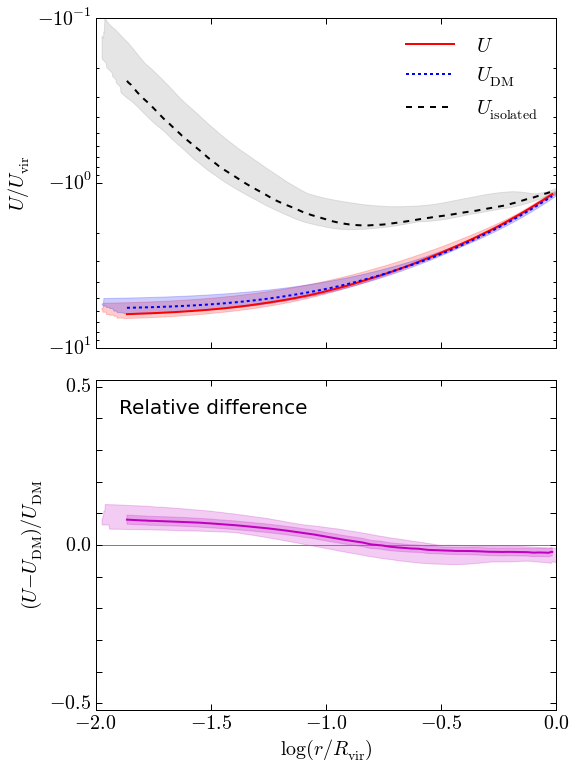

In [5]:
alpha_fill=0.2


fig=figure(figsize=figsize)
clf()

ax3=subplot(211)

fill_between(abscisse,Utot_min,Utot_max,color='r',alpha=alpha_fill)
plot(abscisse,Utot_med,color='r',lw=2,label=r'$U$')

fill_between(abscisse,Udekel_min,Udekel_max,color='b',alpha=alpha_fill)
plot(abscisse,Udekel_med,color='b',ls='--',dashes=(3,3),lw=2,label=r'$U_{\rm DM}$')

fill_between(abscisse,Uin_min,Uin_max,color='gray',alpha=alpha_fill)
plot(abscisse,Uin_med,lw=2,color='k',ls='--',label=r'$U_{\rm isolated}$')



ylabel(r'$U/U_{\rm vir}$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$
legend(fontsize=legendsize,frameon=False,loc='upper right',handlelength=3)

axis(axlim)
yscale('log')
ax3.invert_yaxis()
yticknames=['$-10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,1,7)]
xticks(log10(logspace(-2,1,7)),xticknames)


ax2=subplot(212, sharex=ax3)

axhline(0,color='gray')

fill_between(abscisse,DU_min,DU_max,color='m',alpha=alpha_fill)
fill_between(abscisse,DU_med-DU_rms,DU_med+DU_rms,color='m',alpha=alpha_fill)
plot(abscisse,DU_med,lw=2,color='m')

xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$(U-U_{\rm DM})/U_{\rm DM}$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)

yticknames=['$%.1f$'%log10(item) for item in logspace(-0.5,0.5,11)]
yticknames=['$-0.5$', ' ', ' ', ' ', ' ', '$0.0$', ' ', ' ', ' ', ' ','$0.5$']
yticks(log10(logspace(-0.5,0.5,11)),yticknames,visible=True)

ylim(-.52,.52)
xlim(rlim)

ax=gca()
ax.text(0.05,0.9,r'Relative difference',fontsize=fontsize,transform=ax.transAxes)

setp(ax3.get_xticklabels(), visible=False)

savefig('/vol/sci/astro/home/freundlich/CUSPCORE/ARTICLE/figures2/fig_UDM.pdf')#, bbox_inches='tight')
